# Lab 4 - Correlation & Linear Regression

## Data Mining Process: CRISP-DM

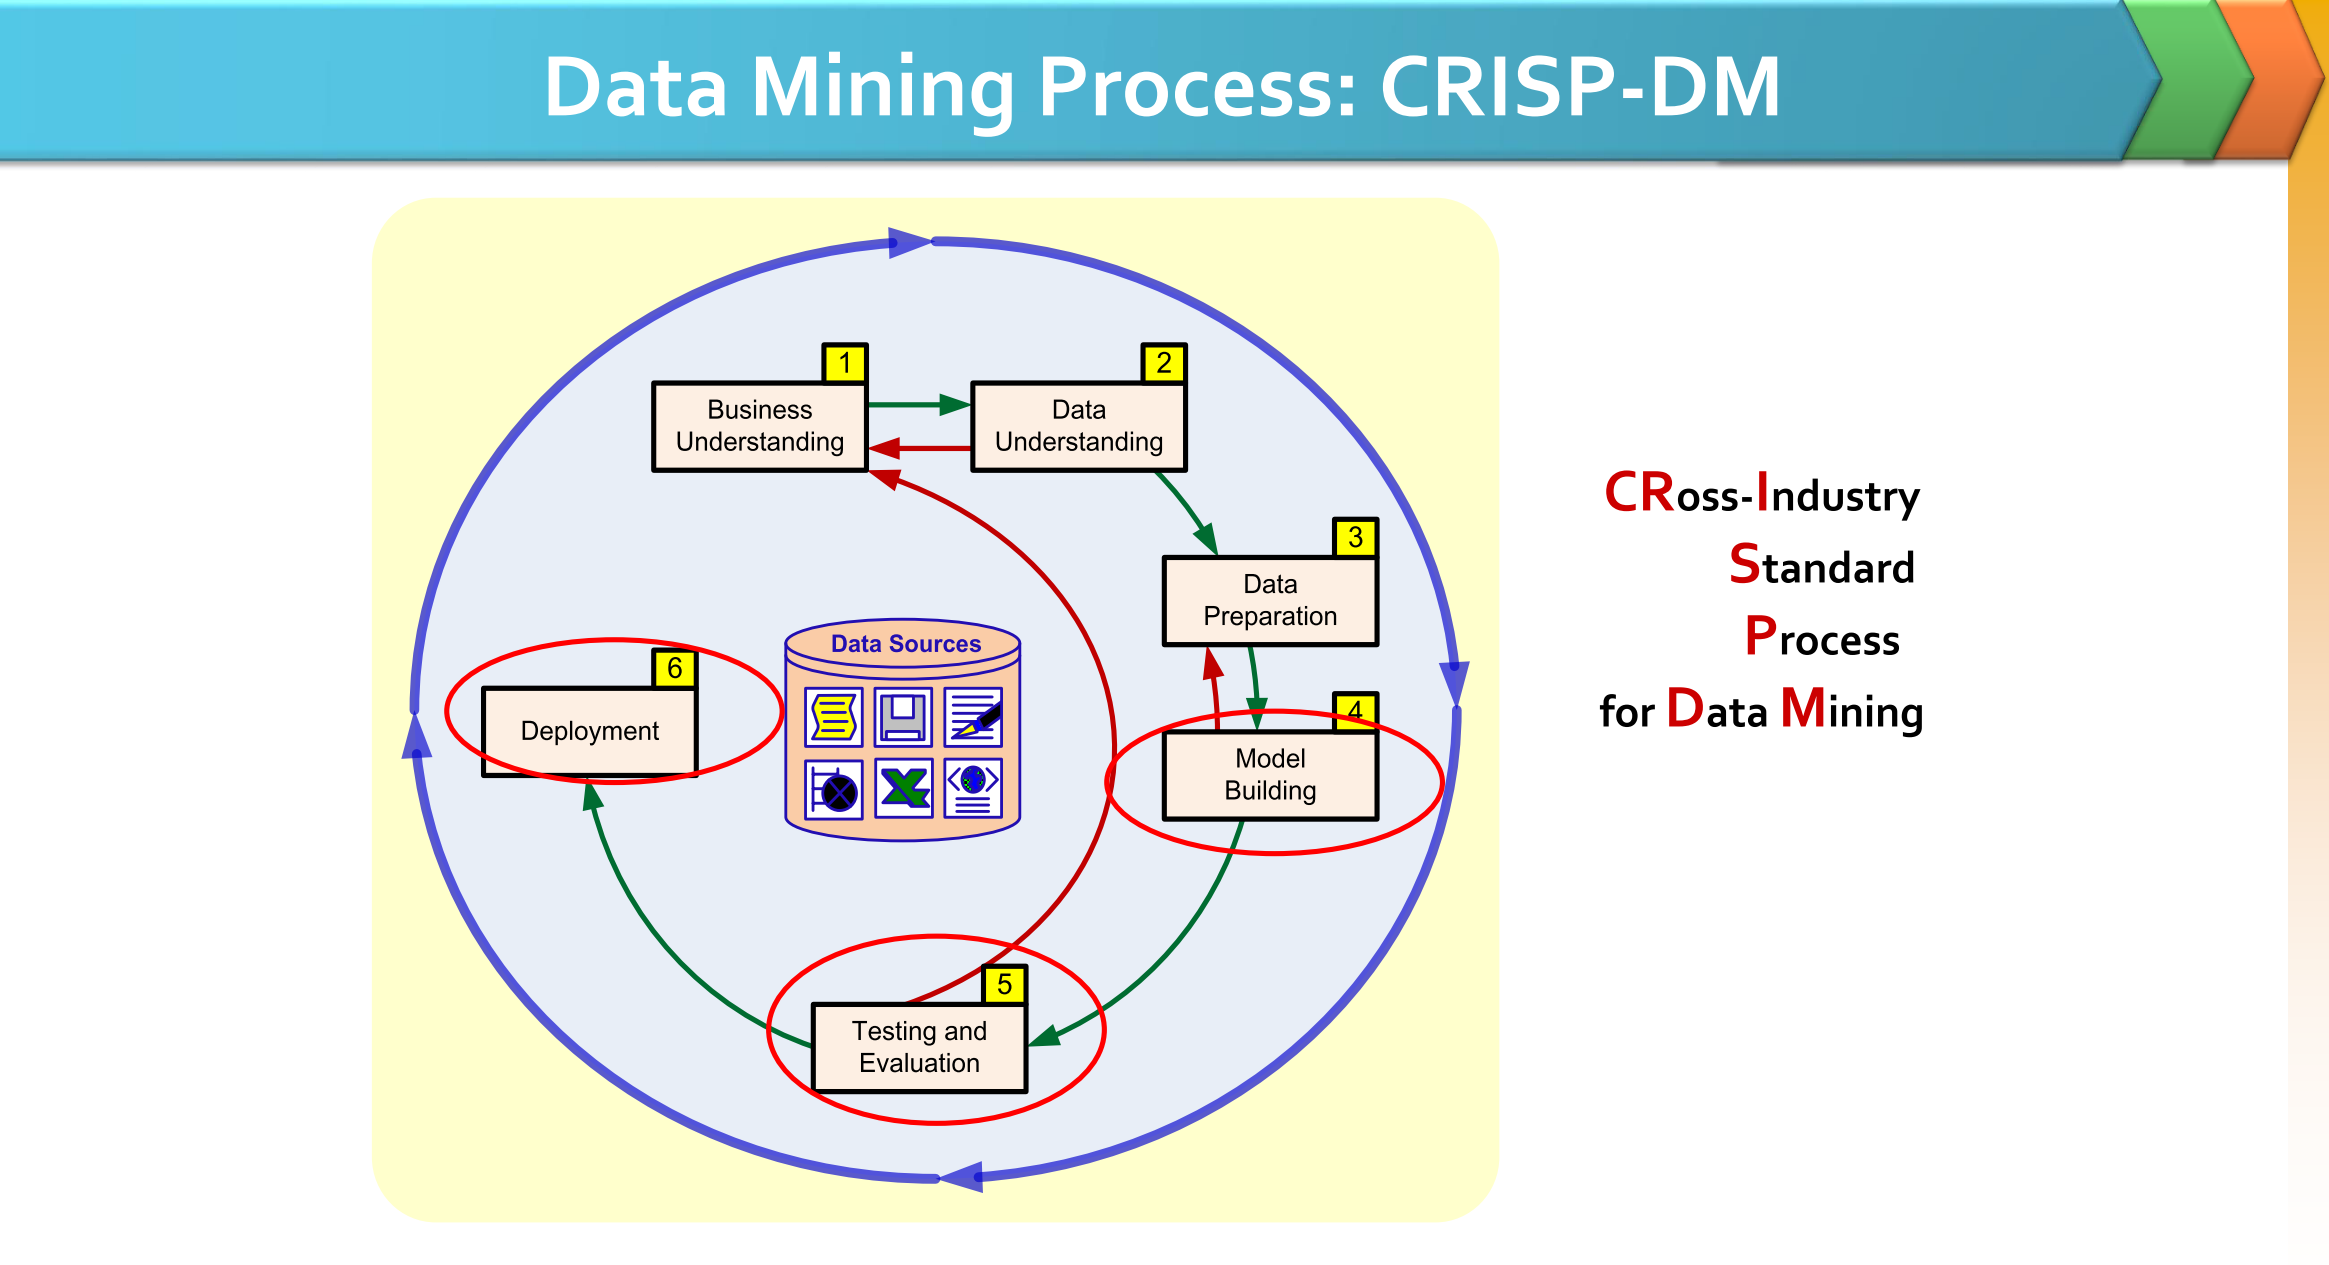

## Linear Regression

## Definition & Working Principle

Linear regression is a **supervised learning** algorithm used when the dependent variable (i.e. what you want to predict) is a **continuous** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using a best fit line.

It works on the principle of ordinary least square $(OLS)$ / mean square error $(MSE)$. In statistics, $OLS$ is a method to estimate unknown parameters of linear regression function, its goal is to minimize the sum of square difference between the observed dependent variable in the given data set and those predicted by linear regression function.

## Hypothesis representation

We will use $\mathbf{x_i}$ to denote independent variables and $\mathbf{y_i}$ to denote dependent variables. A pair of $\mathbf{(x_i,y_i)}$ is called a training example. The subscript $\mathbf{i}$ denotes the training set's indicies. If we have $\mathbf{m}$ training examples, then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as:

$$\mathbf{Y_i = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameters of this hypothesis. This is the equation for **simple/univariate linear regression**.

If more than one independent variable exists, then the equation changes from being **simple/univariate linear regression** to  **multiple linear regression**. In this case, we will use $\mathbf{x_{ij}}$ to denote the independent variables and $\mathbf{y_{i}}$ to denote the dependent variables. If we have $\mathbf{n}$ independent variable, then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{Y_i = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training examples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training example of $\mathbf{j^{th}}$ feature.


## Problem & Dataset

We will build a linear regression model for the medical insurance charges dataset. The dataset consists of the following features: age, sex, BMI (body mass index), children, smoker, and region, which are our independent variables; in addition to charge, which is our dependent variable. In this lab, we will predict individual medical charges billed by health insurance, so that they may be used to determine a client's insurance premium.


## Import Libraries & Dataset

Now we will import a couple of Python libraries required for our analysis and import dataset

In [ ]:
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
try:
    df = pd.read_csv('../data/insurance.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print('Number of rows and columns in the data set:', df.shape)

Number of rows and columns in the data set: (1338, 7)


Now that we imported the dataset, looking at the shape of dataset returns `(1338, 7)`. Meaning, there are $m=1338$ training examples and $n=7$ variables. The target variable here is `charges` and the remaining six variables `age`, `sex`, `bmi`, `children`, `smoker`, `region` are independent variables. Since there are multiple independent variables, we need to fit multiple linear regression. Then the hypothesis function looks like

$$\mathbf{ Y_i = \theta_0+\theta_1 age + \theta_2 sex + \theta_3 bmi + \theta_4 children + \theta_5 smoker + \theta_6 region }$$

This multiple linear regression equation for the given dataset.  
If $\mathbf{i=1}$ then
$$\mathbf{Y_1 = \theta_0+\theta_1 19 + \theta_2 female + \theta_3 27.900 + \theta_4 0 + \theta_5 yes + \theta_6 southwest}$$
$$\mathbf{y_1 = 16884.92400}$$
If $\mathbf{i=2}$ then $$\mathbf{Y_2 = \theta_0+\theta_1 18 + \theta_2 male + \theta_3 33.770 + \theta_4 1 + \theta_5 no + \theta_6 southeast}$$
$$\mathbf{y_2 = 1725.55230}$$
*Note*: In python, indices start from 0.
$$\mathbf{x_1 = \left(\begin{matrix} x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16}\end{matrix}\right) = \left(\begin{matrix} 19 & female & 27.900 & 0 & yes & southwest\end{matrix}\right) }$$

## Exploratory Data Analysis (EDA)

Quick look at the column data types and summary statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking for missing values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Calaculating the correlation matrix for numerical attributes

In [ ]:
corr = df.corr(numeric_only=True)
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Let's see which values are strongly correlated with the charges attribute. We'll sort by the values' absolute value in descending order.

In [ ]:
corr['charges'].sort_values(ascending=False, key=lambda x: x.abs())

,charges
charges,1.000000
age,0.299008
bmi,0.198341
children,0.067998


Let's plot the correlation matrix as a heatmap.

Heatmaps are an easy way of showing the relationship between 2 variables by representing the values using color, varied by hue or intensity.

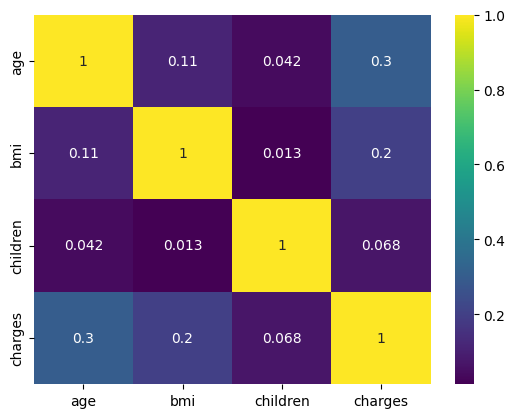

In [ ]:
sns.heatmap(corr, cmap='viridis', annot = True);

How do the insurance charges differ based on sex, or whether a person is a smoker or not?

Violin plots are similar to box plots, except they also show the [probability density](https://en.wikipedia.org/wiki/Probability_density_function) of the data. Violin plots are more informative than box plots because they also show the distribution of the data, in addition to the summary statistics shown in box plots (mean/median and interquartile ranges). They are particularly useful when the data is multimodal (i.e. distribution has more than one peak).

<ipython-input-53-538ed2641ea0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges', data=df, palette='Wistia')


<Axes: xlabel='sex', ylabel='charges'>

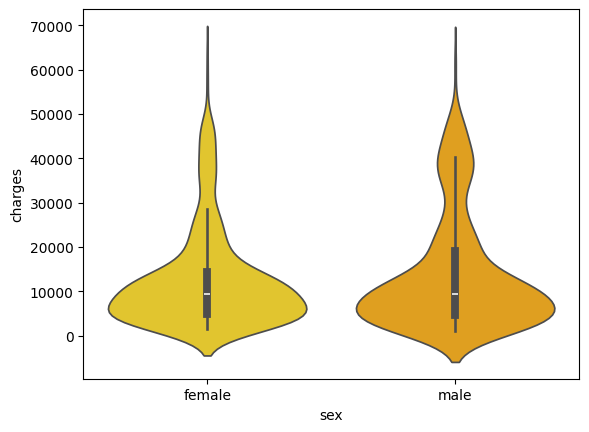

In [ ]:
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia')

Let's compare the Violin plots for `sex` and `smoker` columns side by side

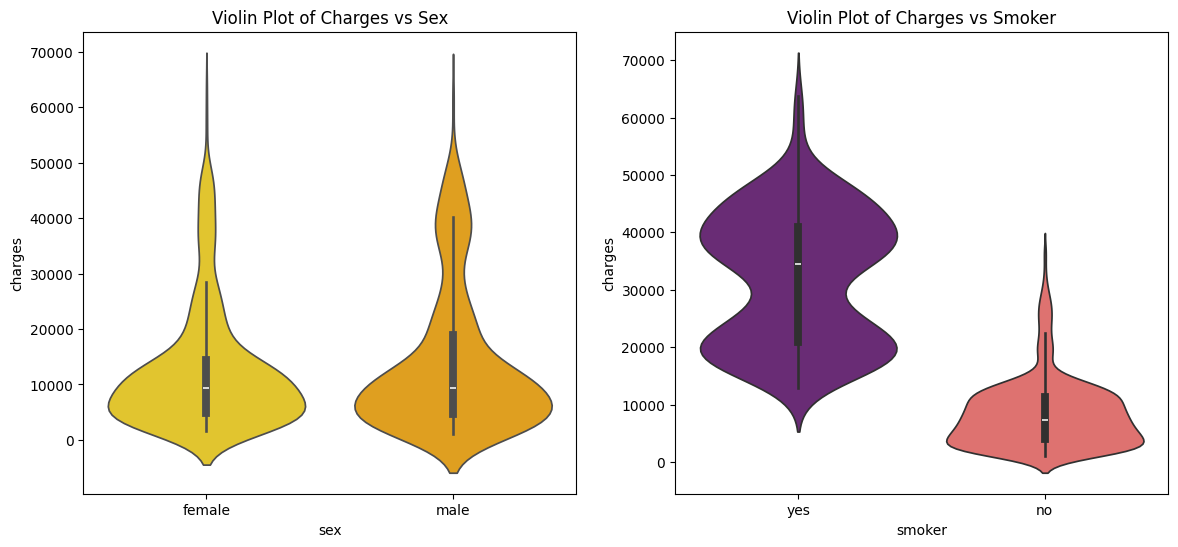

In [ ]:
# Adding them side by side by creating a subplot object
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121) # 121 is equivalent to writing: nrows=1, ncols=2, index=1
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia',hue='sex', legend=False, ax=ax)
ax.set_title('Violin Plot of Charges vs Sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges', data=df, palette='magma',hue='smoker', legend=False,ax=ax)
ax.set_title('Violin Plot of Charges vs Smoker');

Let's have a look at the number of smokers and non-smokers across both genders

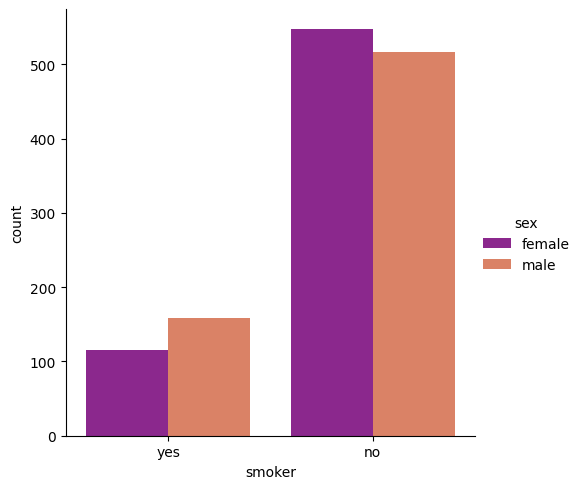

In [ ]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='plasma', data=df);

Let's have a look at the distribution of BMI in the dataset using a histogram. Histograms are useful in showing (an approximate representation of) the distribution of numerical data. Notice how the mean and the median are almost the same value, showing an almost normal distribution.

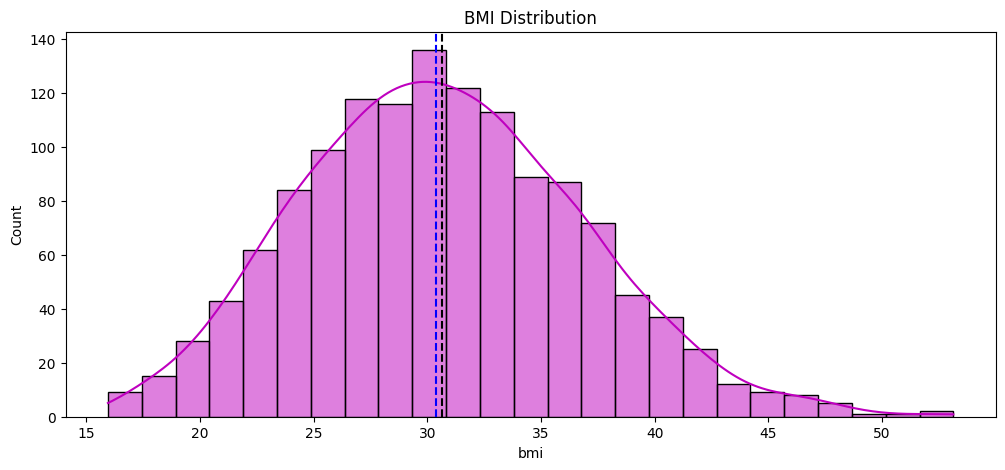

In [ ]:
plt.figure(figsize=(12,5))
plt.title('BMI Distribution')

ax = sns.histplot(df['bmi'], color = 'm', kde=True)
ax.axvline(df['bmi'].mean(), color='k', linestyle='--');
ax.axvline(df['bmi'].median(), color='b', linestyle='--');

Let's also have a look at the distribution of our response variable `charges` in the dataset using a histogram. Here, the data distribution is right-skewed (notice how the right tail is longer, and the mean is to the right of the median). Usually, log-scaling addresses this issue, and this is explored in the exercise notebook to see how it would impact the score.

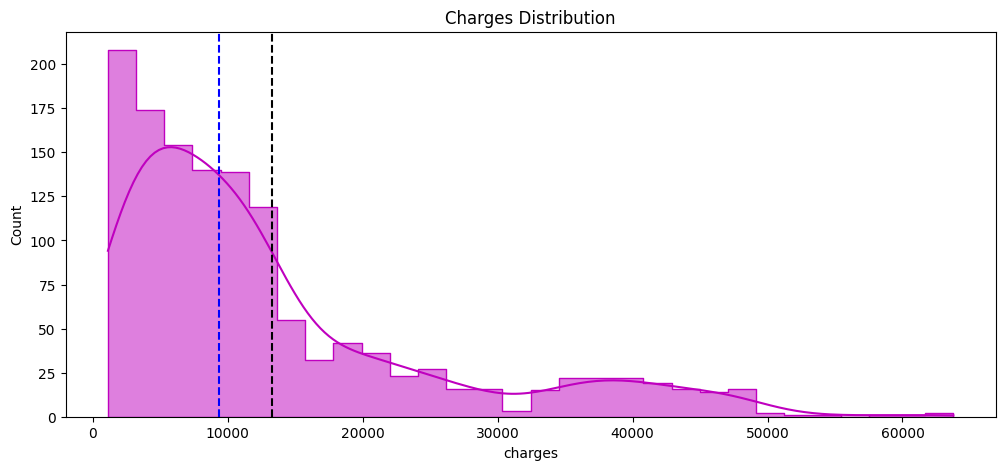

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Charges Distribution')

ax = sns.histplot(df['charges'], color = 'm', element='step', kde=True)
ax.axvline(df['charges'].mean(), color='k', linestyle='--');
ax.axvline(df['charges'].median(), color='b', linestyle='--');

Scatter plots are useful to plot two numeric variables against one another. We can use colors to visually segment different categories and observe their overall patterns.

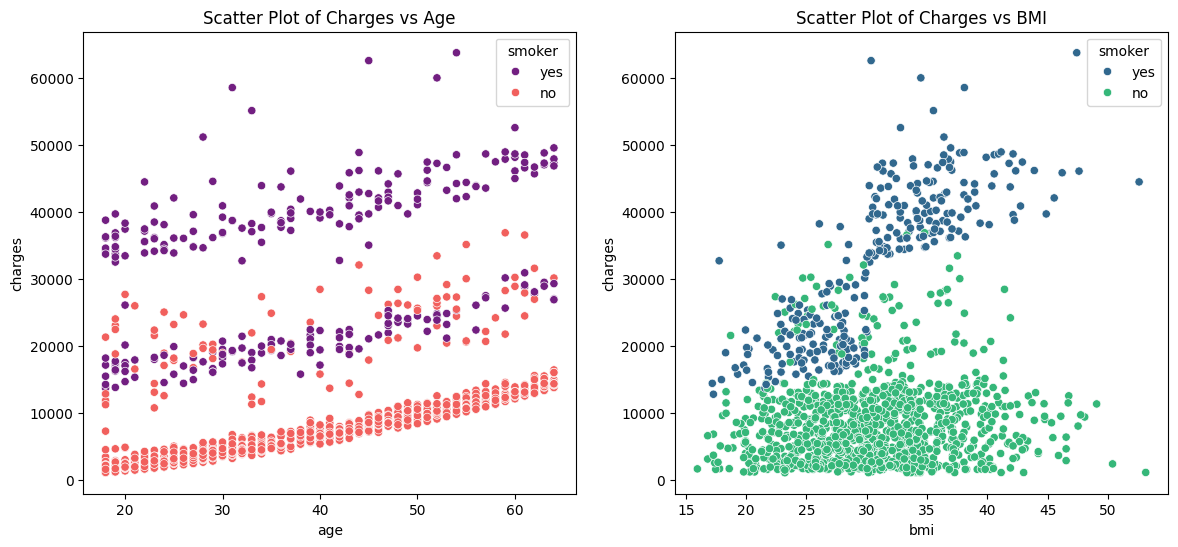

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=df, palette='magma', hue='smoker', ax=ax)
ax.set_title('Scatter Plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=df, palette='viridis', hue='smoker', ax=ax)
ax.set_title('Scatter Plot of Charges vs BMI');

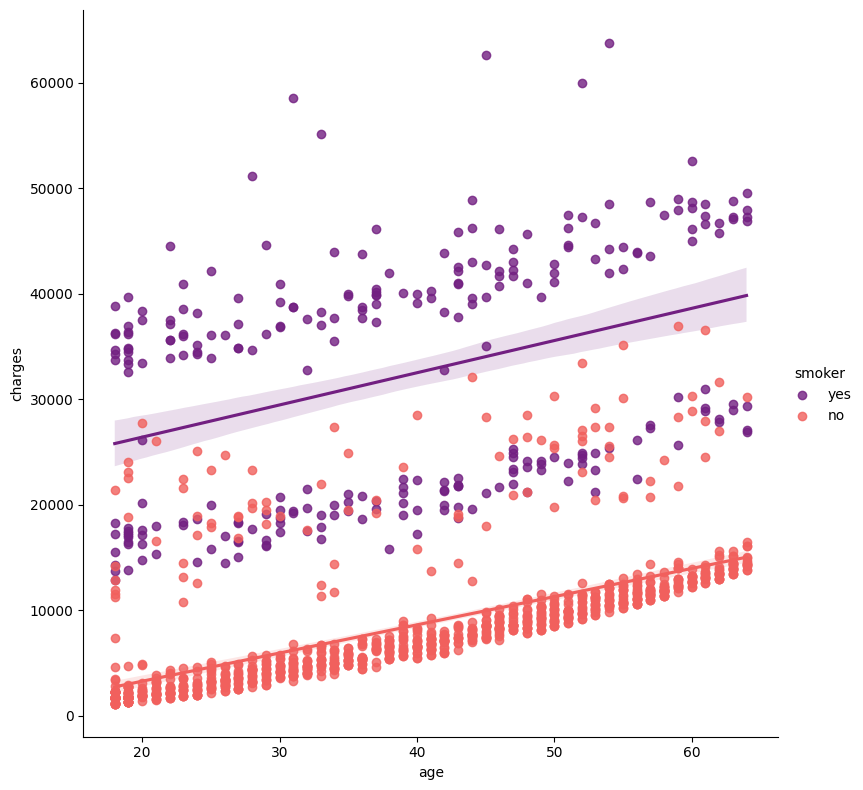

In [ ]:
# Plot a line of best fit for each scatter plot
sns.lmplot(x='age', y='charges', data=df, palette='magma', hue='smoker', height=8);

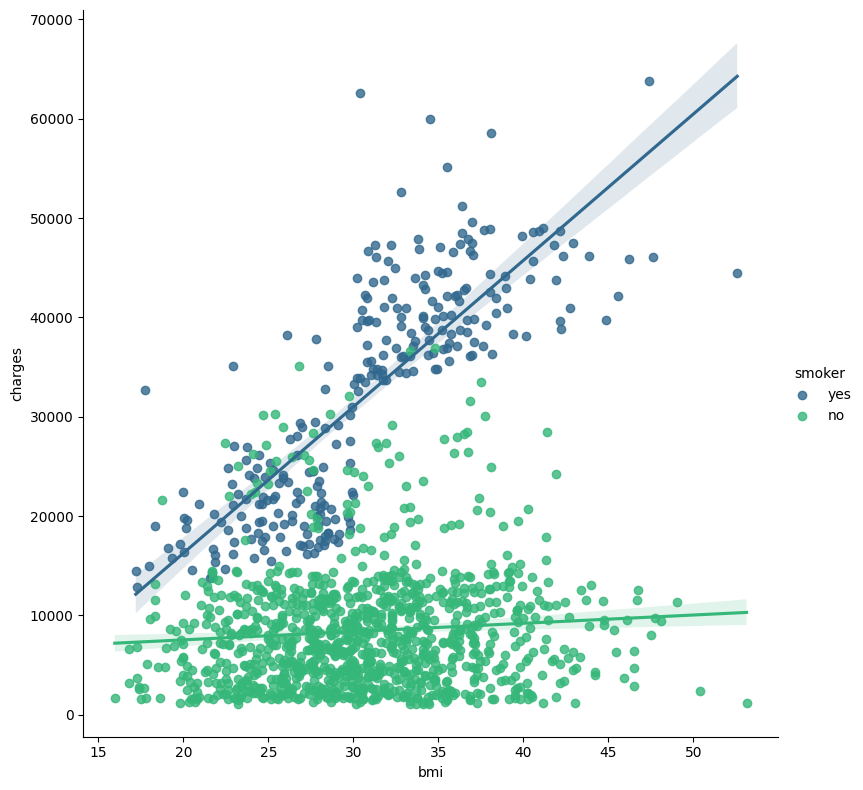

In [ ]:
sns.lmplot(x='bmi', y='charges', data=df, palette='viridis', hue='smoker', height=8);

## Data Preprocessing

### Feature Selection

Feature Selection is one of the most important steps in data preparation for modelling, specifically, for Linear Regression problems.

In feature selection (i.e. selecting suitable columns for modelling), you should select only the most useful columns that influence the dependent variable. Irrelevant columns should be dropped before modelling, and there must be reasons for why you dropped the columns you did and why you kept the others.


You can decide on the most necessary columns based on various ways:

- The <b>domain knowledge</b> is one of the important ways used to make decisions about data. Thus, you can decide on the most necessary columns based on <b>logic/ domain knowledge</b> (drop the columns that, logically, don't affect the dependent variable and justify). <b>The priority should be given to the logic/ domain knowledge technique</b> since this represents your understanding for the business scenario being discussed.

- Moreover, you can use the <b>correlation matrix</b> to check for the highly correlated independent variables with the dependent variable.

- Finally, you can decide based on the <b>model evaluation</b>. Seek the columns that enhance the model performance and at the same time avoid overfitting.

<br>

**It's always a balance between enhanced performance and avoiding overfitting.**

<br>

### Encoding

Most machine learning algorithms (linear regression included) cannot work with categorical data directly, and so categorical data must be converted to a numerical data type. There are multiple ways to deal with this problem, some of them are:

- Label Encoding
- One-Hot Encoding

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them. Essentially, each category is mapped to an integer value.

**One-hot encoding** is a representation of categorical variables as binary vectors. This is known as creating dummy variables in statistics, where qualitative values are divided into mutually exclusive categories (such as smoker and non-smoker).


**More on Encoding**

Label encoding assigns each category a unique integer. By default, if no ordering is specified, the alphabetical ordering of the categories is used. This may cause issues in model learning if the category is nominal, e.g. 'Egypt' and 'Ecuador' would be considered similar to a model like K-NN because of label encoding.

One-Hot Encoding (described in the previous lab) should generally be used when:

- The categorical feature is nominal
- The number of categories is low

Label encoding should generally be used when:

- The categorical feature is ordinal
- The number of categories is large (causing high memory consumption and computationally expensive models when using one-hot encoding)

<br>

One-Hot Encoding is the appropriate approach to use in our case, since the categorical variables we have here are nominal. However, One-Hot Encoding can result in a scenario in which the independent variables are multicollinear (i.e. one variable can be predicted from another with very high accuracy). This is known as the **dummy variable trap**, and it can be avoided by removing one of the dummy variables.

So, we'll use the pandas `get_dummies` function to one hot encode features; in this case the sex, smoker, and region features. By setting `drop_first=True`, we'll avoid falling into dummy variable trap by dropping one of the dummy variables for each of the categorical columns.

In [ ]:
categorical_columns = ['sex', 'smoker', 'region']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'children' 'charges' 'sex_male' 'smoker_yes'
 'region_northwest' 'region_southeast' 'region_southwest']

Number of rows and columns in the dataset: (1338, 9)


In [ ]:
df_encode.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Normalization

You should consider scaling the quantitative data to fall within a smaller, specified standardized range. Features with a wide range of values often dominate the distance measure calculation, so using scaling would be advised. Consider the following techniques that were covered in previous lectures:

 - Min-Max Normalization (uses min and max, often scaling values to a range of [0,1])
 - Z-Score Normalization (uses mean and stddev)
 - Normalization by Decimal Scaling

See https://scikit-learn.org/stable/modules/preprocessing.html for the relevant functions.

Since the Categorical columns have been already encoded using One-hot encoding to 0s and 1s, we need now to scale the Numerical ones. Here, we will only normalize the independent variables.

**Note that only the independent variables should be normalized. You should not normalize the dependent variable since we need realistic estimations for the dependent variable**

Let's scale the values using the Min-Max Normalization. The Min-Max Normalization rescales the feature to a range of [0,1] by subtracting the minimum value of the feature and then dividing by the range. We can apply the min-max scaling in Pandas using the `min()` and `max()` instance methods.

$$
  {v'} = \frac{v - min_{a}}{max_{a} - min_{a}}
$$

In [ ]:
numerical_columns = ['age', 'bmi', 'children']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,0,1,0,0,1
1,0.000000,0.479150,0.2,1725.55230,1,0,0,1,0
2,0.217391,0.458434,0.6,4449.46200,1,0,0,1,0
3,0.326087,0.181464,0.0,21984.47061,1,0,1,0,0
4,0.304348,0.347592,0.0,3866.85520,1,0,1,0,0


## Train-Test split

Model evaluation and validation is one of the key steps in data mining tasks, so we can assess the model's generalization capabilities and its performance on unseen data. For that pupose, we'll split the data we have into a training dataset (used for training the model) and a testing dataset (used to evaluate the model's performance).

We'll import and use `sklearn`'s `train_test_split` function to randomly split our data into 80% testing and 20% testing.

In [ ]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('charges',axis=1) # Independent variable
y = df_encode['charges'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 1070
Testing dataset size: 268


## Model building

Now, let's import `sklearn`'s `LinearRegression` model and `fit` (i.e. train) the model to our training dataset.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

The linear regression model finds the theta values that result in the least

$$\mathbf{Y_i = \theta_0 + \theta_1 age + \theta_2 bmi + \theta_3 children + \theta_4 sex\_male + \theta_5 smoker\_yes + \theta_6 region\_northwest + \theta_7 region\_southeast + \theta_8 region\_southwest}$$

We can inspect the parameters of the fitted linear regression model

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-1470.669090
1,theta_1,age,11250.755416
2,theta_2,bmi,12579.986227
3,theta_3,children,2559.347176
4,theta_4,sex_male,-93.045165
5,theta_5,smoker_yes,24000.548124
6,theta_6,region_northwest,-545.567916
7,theta_7,region_southeast,-1238.683849
8,theta_8,region_southwest,-1494.972657


With this information, we can represent the model using the multiple linear regression formula. Prediction is done by substituting the variables with their corresponding values.

$$\mathbf{Y_i = -1470.669090 + 11250.755416(age) + 12579.986227(bmi) + 2559.347176(children) -93.045165 (sex\_male) + 24000.548124 (smoker\_yes) -545.567916 (region\_northwest) -1238.683849 (region\_southeast) -1494.972657 (region\_southwest)}$$


## Model Evaluation

We will predict the values for the target variable by providing the test set to the model's `predict` function. Then, we'll compare the predicted value with the actual/true value in the test set. We can compute the **Root Mean Square Error (RMSE)** using the following formula. This allows us to compare the average deviation in the same units as the response variable.
$$\mathbf{ RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N}(\hat{y}_i - y_i)^2}}$$

$\mathbf{R^2}$ (coefficient of determination) represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. In other words, it is a statistical measure of how close the true values are to the fitted regression line. A score of 0 indicates that the model explains none of the variability of the response data around its mean. A score of 1.0 (best possible score) indicates that the model explains all of the variability of the response data around its mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
$$\mathbf{\textrm{Sum of Square Error} (SSE) = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{\textrm{Sum of Square Total} (SST) = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  5886.599432559382
R^2 obtained is: 0.7536440382001556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The linear regression model's $R^2$ score is **0.75**. What is considered a good $R^2$ value depends on the domain context and use-case. Scientific studies may require an $R^2 > 0.95$, while some companies may find an $R^2 > 0.3$ to be sufficient for their needs. In general, the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response variable. How high an R-squared value needs to be to be considered “good” varies based on the field. Some fields require higher precision than others.

That said, 0.75 is an acceptable baseline to achieve without any data transformation or outlier handling. It is important to note that linear regression is sensitive to outliers, and their presence may significantly worsen the model's performance.

The root mean squared error is around 5887. This tells us that the average deviation between the predicted insurance charges and the actual billed insurance charges is 5,887 dollars.

RMSE is an absolute error metric. This means an error of 1000 is treated the same, whether that error is from a 1,000 dollar difference in the prediction for a 2,000 dollar insurance bill or a 15,000 dollar insurance bill. Alternative metrics used in the code below include the median absolute error (MAE), which is more robust to outliers than RMSE; mean absolute percentage error, which is sensitive to relative errors (recommended to use for skewed and heteroscedastic data, as in this context); and mean squared logarithmic error (MSLE), which is best to use when the response target exhibits exponential growth, and it penalizes an under-predicted estimate greater than an over-predicted estimate, which an insurance company may want to prioritize). Which metric to ultimately use is left as an exercise to the reader.


Extra reading:
- Available regression metrics in scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
- Why does skew and heteroscedasticity lead to bias?: https://stats.stackexchange.com/questions/300281/why-does-skew-and-heteroscedasticity-lead-to-bias

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.4474345028789904
The median absolute error (MAE) is:  2426.920720691453


## Model Validation

In order to validated model we need to check a few assumptions of linear regression models. The common assumptions being:

- The relationship between the dependent and independent variable is linear. This can be checked by ploting the actual values against the predicted values on a scatter graph.
- The residual error plot should be normally distributed.
- The mean of residual error should be 0 or close to 0 as much as possible.
- All variables are multivariate normal. This assumption can be checked with a Q-Q plot.
- There is little or no multicollinearity in the data. The variance inflation factor (VIF) identifies correlation between independent variables and strength of that correlation. $\rm{VIF}=\frac{1}{1−R^2}$, where $\rm{VIF} > 10$ implies high multicolinearity.
- The data is homoscedastic, meaning the residuals have constant variance. This can be checked by ploting the residual against fitted value on a scatter graph (non-homoscedastic data often has a funnel or cone shape).

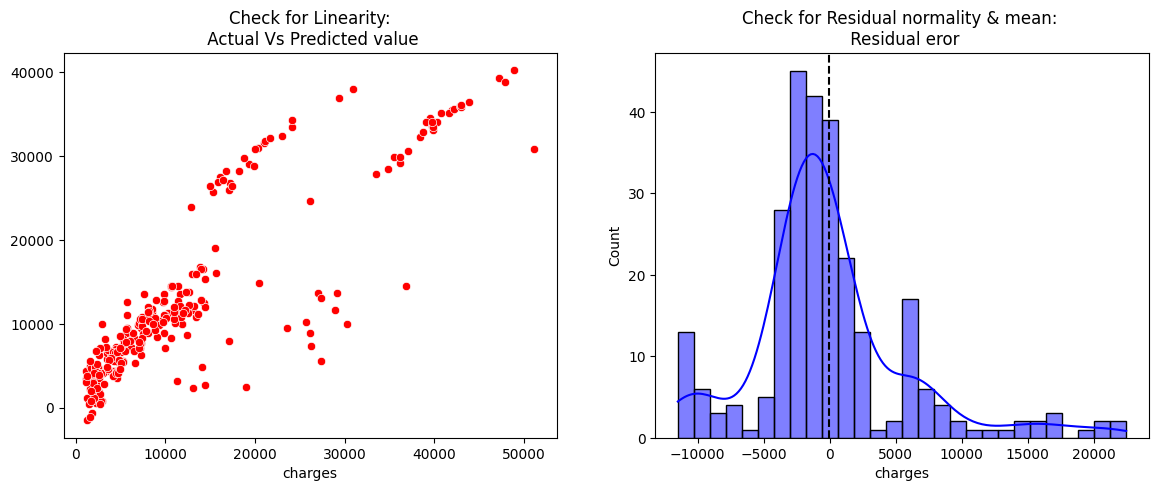

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Extra Reading

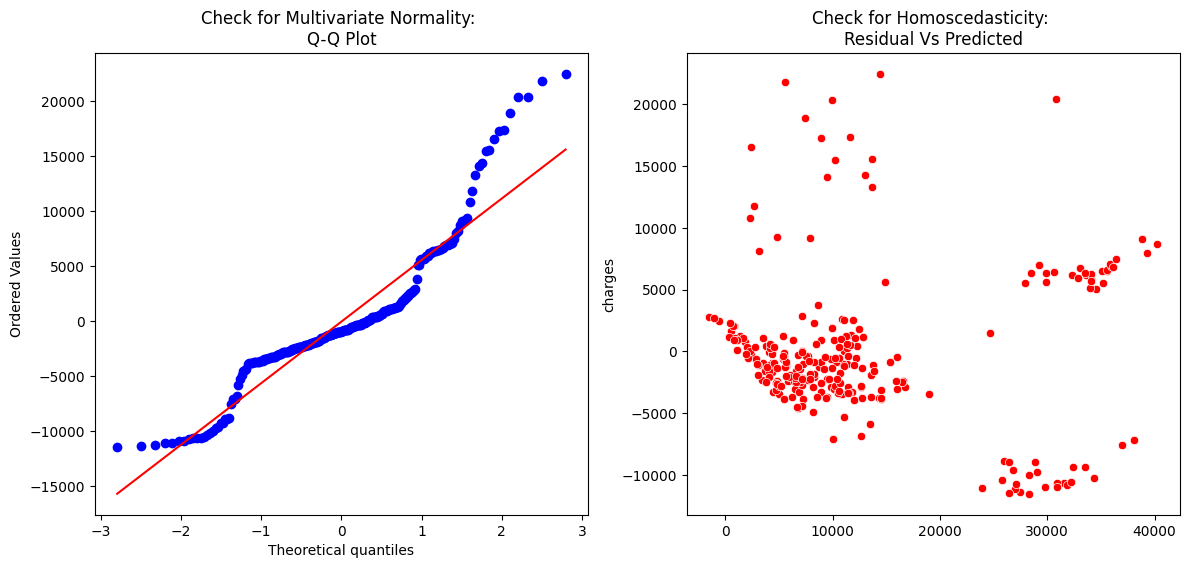

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
# Check for Multicollinearity
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_data = pd.DataFrame()
VIF_data['feature'] = x.columns

VIF_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF_data

,feature,VIF
0,age,2.912168
1,bmi,5.014458
2,children,1.749483
3,sex_male,1.910873
4,smoker_yes,1.247610
5,region_northwest,1.678703
6,region_southeast,2.123695
7,region_southwest,1.770946


Conclusions:

- In this model, the actual vs predicted plot of insurance charges is somewhat linear, except for the window between 18000 and 35000.
- The residual mean is zero and the residual error plot right-skewed
- Q-Q plot shows that the model tends to underestimate higher insurance charges
- The plot is not homoscedastic, so errors will increase after a certain point.
- Variance inflation factor value is less than 10 for most attributes, so the data does not exhibit high multicollinearity.

## Extra: Parsimony and Model Interpretability


The principle of parsimony, proposed by the 14th-century English philosopher William of Occam, states that given a set of equally good explanations for a given phenomenon, the correct explanation is the simplest explanation. This is also known as Occam's razor because explanations are 'shaved' down to the bare minimum.

For statistical modelling, as per Crawley (2009), the principle of parsimony means that:

- models should have as few parameters as possible;
- linear models should be preferred to non-linear models;
- experiments relying on few assumptions should be preferred to those relying on many;
- models should be pared down until they are minimal adequate;
- simple explanations should be preferred to complex explanations.

Parsimonious models are easier to interpret than complex models. If faced with the choice of multiple models with similar predictive performance, the most parsimonious one should be selected.

## Extra: Bonus Comic

| |
|-|
|![xkcd.com/2048](https://imgs.xkcd.com/comics/curve_fitting.png)|
|Source: [XKCD Comics (#2048)](xkcd.com/2048)|

## References
- [Heatmap. Wikipedia.](https://en.wikipedia.org/wiki/Heat_map)
- [Dummy variable (statistics). Wikipedia.](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))
- [Normalization. geeksforgeeks](https://www.geeksforgeeks.org/data-normalization-with-pandas)
- Crawley, M. J. (2009). The R book. Chichester, England: Wiley.

## Acknowledgement

This Jupyter notebook is based on the work by [Sudhir Kumar](https://www.kaggle.com/sudhirnl7/linear-regression-tutorial) and [u/hely333](https://www.kaggle.com/hely333/eda-regression)